# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-sales-dataset-2024/apple_sales_2024.csv


# Read CSV

In [2]:
df = pd.read_csv('/kaggle/input/apple-sales-dataset-2024/apple_sales_2024.csv')
df

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29
...,...,...,...,...,...,...,...
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56
996,Texas,North America,27.83,12.52,8.89,4.46,6.38
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [4]:
df[['State', 'Region']] = df[['State', 'Region']].astype('string')

In [5]:
df.describe(include='all')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
count,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,25,5,NaN,NaN,NaN,NaN,NaN
top,Hong Kong,Rest of World,NaN,NaN,NaN,NaN,NaN
freq,50,221,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.444500,8.565880,5.555760,6.935500,12.447130
std,NaN,NaN,7.180077,3.735994,2.506491,2.951677,4.306347
min,NaN,NaN,5.030000,2.020000,1.010000,2.000000,5.010000
25%,NaN,NaN,11.447500,5.432500,3.470000,4.330000,8.710000
50%,NaN,NaN,17.130000,8.695000,5.550000,6.815000,12.205000
75%,NaN,NaN,23.715000,11.740000,7.730000,9.532500,16.252500


# Exploratory Data Analysis (EDA)

In [6]:
print(df['State'].unique())
print(df['Region'].unique())

<StringArray>
[   'Chongqing',      'Germany',           'UK',     'Shanghai',
     'Thailand',     'New York',       'Mexico',        'Italy',
    'Hong Kong',       'Canada',        'Japan',        'Spain',
    'Australia',      'Beijing',        'India',        'Texas',
   'California', 'South Africa',       'Brazil',      'Florida',
     'Illinois',  'South Korea',    'Indonesia',     'Shenzhen',
       'France']
Length: 25, dtype: string
<StringArray>
['Greater China', 'Europe', 'Rest of Asia', 'North America', 'Rest of World']
Length: 5, dtype: string


In [7]:
df.sort_values(by='Services Revenue (in billion $)', ascending=False)

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
235,Brazil,Rest of World,8.05,14.28,9.69,7.68,19.92
492,Beijing,Greater China,18.81,12.84,2.24,9.83,19.90
100,Japan,Rest of Asia,16.41,2.51,9.37,3.91,19.89
604,California,North America,12.08,6.74,4.70,8.32,19.88
356,Texas,North America,19.08,5.74,4.64,3.64,19.87
...,...,...,...,...,...,...,...
959,Brazil,Rest of World,15.80,7.83,1.76,10.19,5.08
303,Indonesia,Rest of Asia,10.43,2.11,5.41,3.73,5.08
179,Germany,Europe,22.89,14.29,3.96,10.72,5.05
471,Mexico,Rest of World,15.85,7.34,2.61,11.47,5.04


In [8]:
df_region = df.groupby(by=['Region']).sum().drop('State', axis=1)
df_region

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
Region,,,,,
Europe,3563.12,1745.66,1111.22,1353.12,2416.30
Greater China,3868.28,1862.95,1212.80,1514.86,2780.72
North America,3124.14,1625.44,1028.96,1272.92,2281.21
Rest of Asia,3091.50,1473.26,982.94,1296.29,2267.15
Rest of World,3797.46,1858.57,1219.84,1498.31,2701.75


In [9]:
highest_region = df_region['Services Revenue (in billion $)'].max() #Greater China
highest_region

2780.72

In [10]:
total_revenue = df_region['Services Revenue (in billion $)'].sum()
total_revenue

12447.130000000001

In [11]:
highest_region/total_revenue

0.22340250322765165

In [12]:
regions = list(df['Region'].unique())
print(regions)

['Greater China', 'Europe', 'Rest of Asia', 'North America', 'Rest of World']


In [13]:
region_list = list(df_region.index)

<Axes: xlabel='Region'>

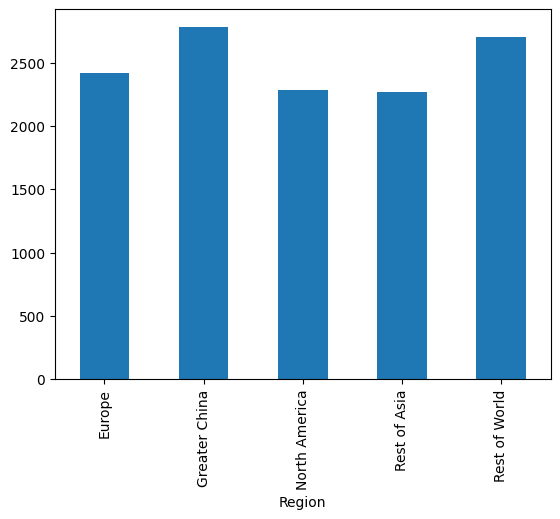

In [14]:
df.groupby('Region')['Services Revenue (in billion $)'].sum().plot(kind='bar', x='Region', y='Services Revenue (in billion $)')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

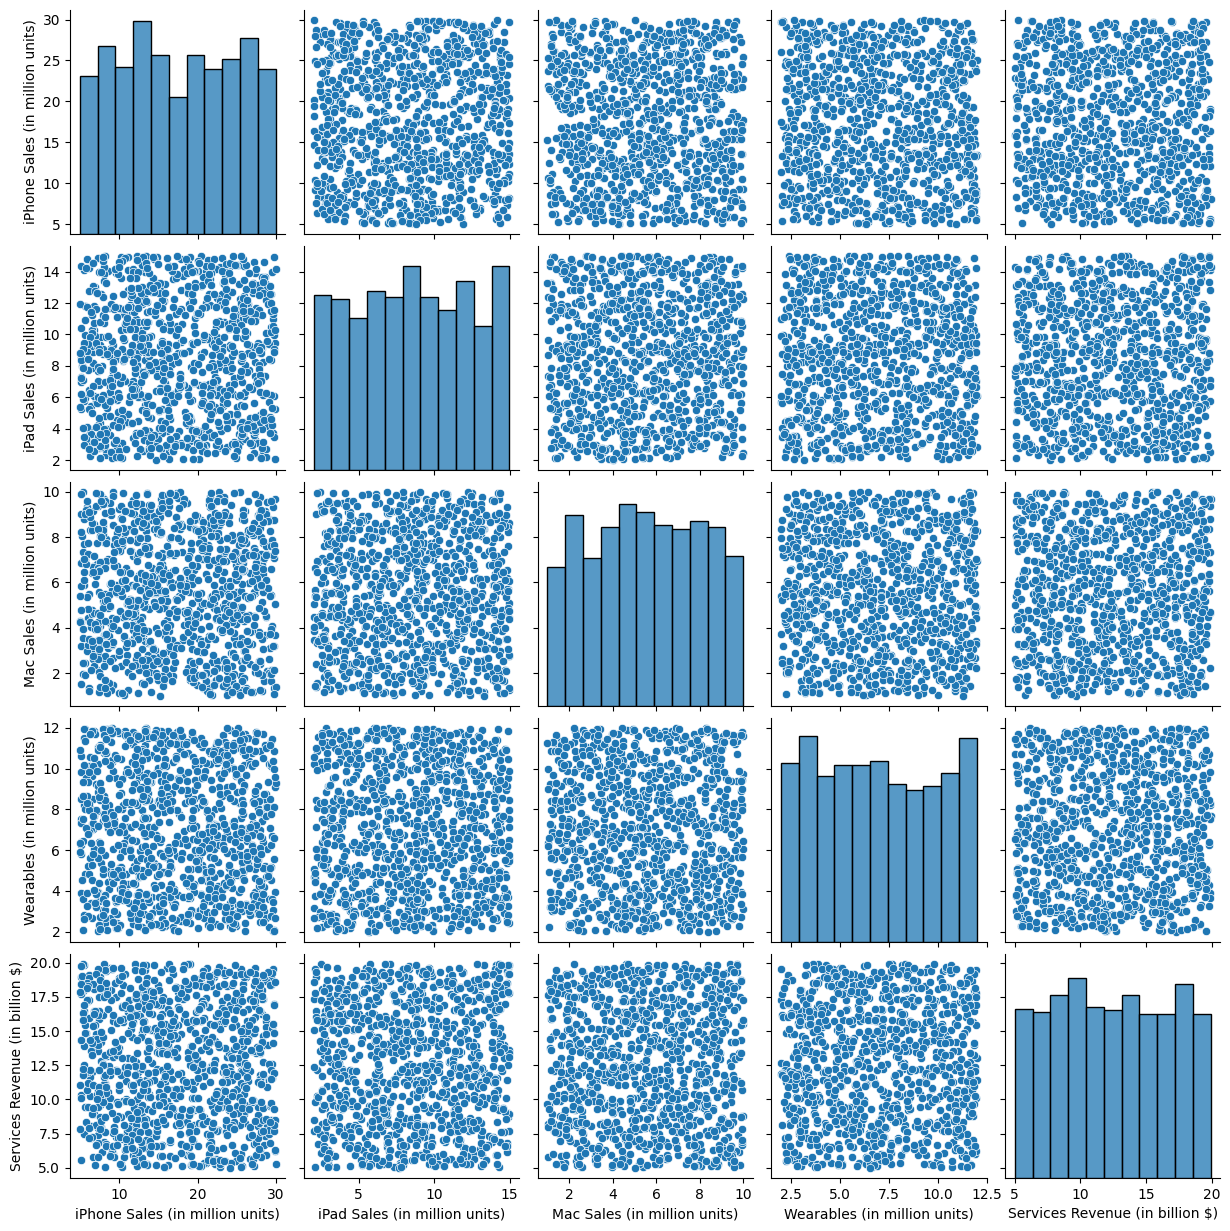

In [15]:
sns.pairplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a0fc7c75960>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0fc7c75420>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a0fc7c75c00>,
 'medians': [<matplotlib.lines.Line2D at 0x7a0fc7c74ee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a0fc7c74c40>,
 'means': []}

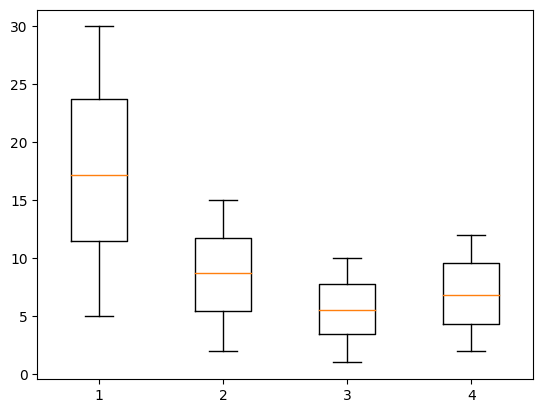

In [16]:
plt.boxplot(df[['iPhone Sales (in million units)', 'iPad Sales (in million units)', 'Mac Sales (in million units)', 'Wearables (in million units)']])

# Feature Engineering

In [17]:
# It seems to me that State and Region are not particularly predictive, so I'll do some tests with and without them.

condition = True

if condition:
    df = df.drop(['State', 'Region'], axis=1)

## One Hot Encoding

In [18]:
if not condition:
    columns_to_encode = ['State', 'Region']
    
    encoder = OneHotEncoder(sparse_output=False)
    
    encoded_array = encoder.fit_transform(df[columns_to_encode])
    encoded_columns = encoder.get_feature_names_out(columns_to_encode)
    
    encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)
    df = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)
    
    display(df)

## Train Test Split

In [19]:
X = df.drop('Services Revenue (in billion $)', axis=1)
y = df['Services Revenue (in billion $)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Modeling

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [21]:
reg.coef_

array([0.00348824, 0.00731307, 0.10786238, 0.07931565])

In [22]:
y_pred = reg.predict(X_test)

# Second Modeling (Test)

In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [24]:
y_pred = reg.predict(X_test)

# Evaluation

In [25]:
mean_squared_error(y_test, y_pred)

17.42798069482197

# Decision Tree Regressor (Test)

In [26]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

y_pred_regressor = regressor.predict(X_test)

In [27]:
mean_squared_error(y_test, y_pred_regressor)

36.22428666666667

# Gradient Boosting Regression

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

y_pred_reg = reg.predict(X_test)

In [29]:
mean_squared_error(y_test, y_pred_reg)

19.90098505904033

# ElasticNet (Ridge/Lasso Regression)

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the ElasticNet model
elastic_net = ElasticNet(max_iter=10000, random_state=0)

# Define the grid of hyperparameters
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # L1/L2 ratio
}

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Test Set MSE:", mse)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'alpha': 10, 'l1_ratio': 0.5}
Test Set MSE: 17.015921155079422
